In [32]:
import numpy as np
import Antenna as Antenna
from Catalog import Catalog as cat
import pandas as pd
from astropy.io import fits


# Define a Hex array and antenna objects

In [33]:
def hex_array(hex_num, sep=14.6, split_core=True):
        # Main Hex
        positions = []
        for row in range(
                hex_num - 1, -hex_num + split_core, -1
        ):  # the + split_core deletes a row
            for col in range(0, 2 * hex_num - abs(row) - 1):
                x_pos = sep * ((-(2 * hex_num - abs(row)) + 2) / 2.0 + col)
                y_pos = row * sep * 3 ** 0.5 / 2
                positions.append([x_pos, y_pos, 0])
        # unit vectors
        up_right = sep * np.asarray([0.5, 3 ** 0.5 / 2, 0])
        up_left = sep * np.asarray([-0.5, 3 ** 0.5 / 2, 0])
        # Split the core into 3 pieces
        if split_core:
            new_pos = []
            for i, pos in enumerate(positions):
                theta = np.arctan2(pos[1], pos[0])
                if pos[0] == 0 and pos[1] == 0:
                    new_pos.append(pos)
                elif -np.pi / 3 < theta < np.pi / 3:
                    new_pos.append(np.asarray(pos) + (up_right + up_left) / 3)
                elif np.pi / 3 <= theta < np.pi:
                    new_pos.append(np.asarray(pos) + up_left - (up_right + up_left) / 3)
                else:
                    new_pos.append(pos)
            positions = new_pos
        return {i: pos for i, pos in enumerate(np.array(positions))}

In [34]:
hex_arr = hex_array(5)

ants = {}
for ant_num,pos in hex_arr.items():
    ants[ant_num] = Antenna.Ant(ant_num,pos)
    

# Bring in GLEAM data

In [35]:
hdul = fits.open("/Users/jameskwon/Documents/Research/21cm Cosmology/codes/GLEAM_EGC_v2.fits")
frame = pd.DataFrame(hdul[1].data)

In [24]:
c = cat(frame, 100, time=np.linspace(0,2*np.pi, 100), freqs=np.linspace(140, 160, 5))

(100,)


In [25]:
def visibility(flux,beam,phase):
    return np.einsum('ij,ikj->kj',flux,beam*phase)
    
def run(ants,catalog):#Key antenna numeber, value: object 
    bls = {}
    beams = {}
    vis = {}
    flux = catalog.flux

    for i, ant_i in ants.items():
        for j, ant_j in ants.items():
            if i <= j:
                bls[(i,j)]=np.subtract(ant_i.position,ant_j.position) #Baseline works
                beam_i = ant_i.airy_beam(catalog.s_vectors[0], catalog.s_vectors[1], catalog.freqMHz)
                beam_j = ant_j.airy_beam(catalog.s_vectors[0], catalog.s_vectors[1], catalog.freqMHz)
                beam = np.sqrt(beam_i*beam_j)
                phase = catalog.getPhase(bls[i,j])
                vis[(i,j)] =visibility(flux,beam,phase)

    return bls, beams, vis

In [26]:
bls, beams, vis = run(ants,c)

In [27]:
vis[(0,1)].shape

(100, 5)

In [28]:
import matplotlib.pyplot as plt

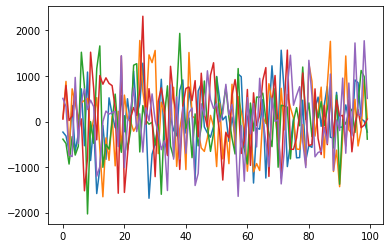

In [29]:
plt.figure()
plt.plot(vis[(0,16)][:,:])

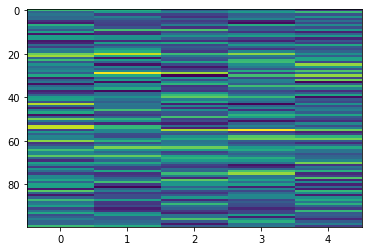

In [31]:
plt.imshow(np.abs(vis[(16,23)]), aspect = 'auto')

In [13]:
c.s_vectors[0].shape

(20, 10)

In [11]:
a = np.ones(10)
b = np.ones(9)

In [15]:
np.einsum('i,j->i', a, b)

array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])